<a href="https://colab.research.google.com/github/muzeyir/gene-expression-cancer-classification/blob/main/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 Capstone Project: Disease Classification from Gene Expression Data

## 🎯 Objective:
The goal of this project is to classify the **type of cancer** based on gene expression data from various samples. The dataset includes expression levels for 20,532 genes across 801 patient samples.

We aim to:
- Perform data cleaning and exploratory analysis
- Reduce high-dimensional features (PCA, t-SNE)
- Build multi-class classification models
- Interpret model predictions using SHAP or similar tools

---

**Classes (Cancer Types):**
- BRCA: Breast cancer
- LUAD: Lung cancer
- PRAD: Prostate cancer
- KIRC: Kidney cancer
- COAD: Colon cancer
---

**Dataset Overview:**
- `data.csv` — gene expression matrix (801 samples × 20,532 genes)
- `labels.csv` — target class for each sample (cancer or not)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd


data_path = '/content/drive/MyDrive/data-for-capstone-project/data.csv'
label_path = '/content/drive/MyDrive/data-for-capstone-project/labels.csv'

df_data = pd.read_csv(data_path)
df_label = pd.read_csv(label_path)



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set(style = 'whitegrid')

print('Features : ', df_data.shape)
print('Labels : ', df_label.shape)

Features :  (801, 20532)
Labels :  (801, 2)


  Unnamed: 0 Class
0   sample_0  PRAD
1   sample_1  LUAD
2   sample_2  PRAD
3   sample_3  PRAD
4   sample_4  BRCA
Columns :  Index(['Unnamed: 0', 'Class'], dtype='object')


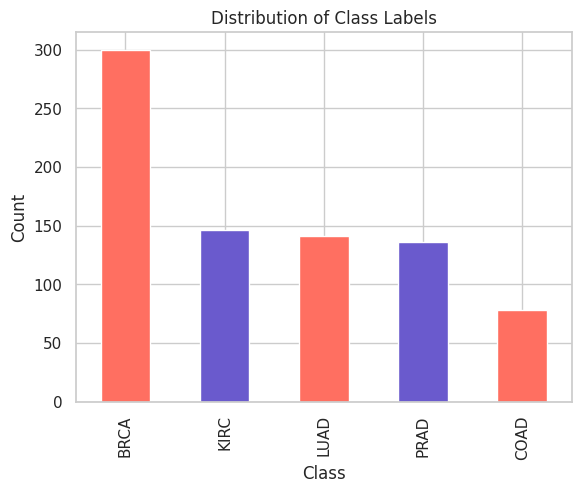

In [9]:
print(df_label.head())

print('Columns : ', df_label.columns)
label_col = df_label.columns[1]
df_label[label_col].value_counts().plot(kind='bar', color=['#ff6f61','#6a5acd'])
plt.title('Distribution of Class Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Total missing values :  0
        count      mean       std       min       25%       50%        75%  \
gene_0  801.0  0.026642  0.136850  0.000000  0.000000  0.000000   0.000000   
gene_1  801.0  3.010909  1.200828  0.000000  2.299039  3.143687   3.883484   
gene_2  801.0  3.095350  1.065601  0.000000  2.390365  3.127006   3.802534   
gene_3  801.0  6.722305  0.638819  5.009284  6.303346  6.655893   7.038447   
gene_4  801.0  9.813612  0.506537  8.435999  9.464466  9.791599  10.142324   

              max  
gene_0   1.482332  
gene_1   6.237034  
gene_2   6.063484  
gene_3  10.129528  
gene_4  11.355621  


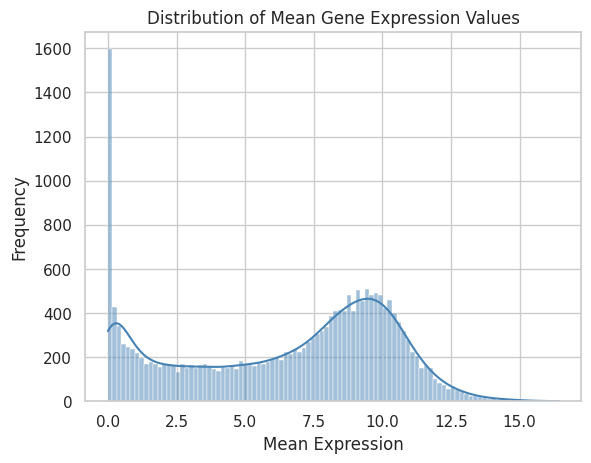

In [15]:
null_counts = df_data.isnull().sum().sum()
print('Total missing values : ', null_counts)

desc = df_data.describe().T
print(desc.head())

df_numeric = df_data.select_dtypes(include = [np.number])

gene_means = df_numeric.mean(axis=0)
sns.histplot(gene_means, bins = 100, kde = True, color = 'steelblue')
plt.title('Distribution of Mean Gene Expression Values')
plt.xlabel('Mean Expression')
plt.ylabel('Frequency')
plt.show()